In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.square(x)


In [3]:
# Define the MLP class
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

        # Initialize biases
        self.bias_hidden = np.random.rand(self.hidden_size)
        self.bias_output = np.random.rand(self.output_size)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = tanh(self.hidden_input)  # Use tanh activation for hidden layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.final_input  # Linear activation for output layer
        return self.final_output

    def backward(self, X, y, output, learning_rate):
        # Calculate the error
        output_error = y - output
        
        # Calculate the gradient for the output layer
        output_delta = output_error
        
        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * tanh_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

# Function to generate target outputs based on the given formula
def target_function(x):
    return (1 + 0.6 * np.sin(2 * np.pi * x / 0.7) + 0.3 * np.sin(2 * np.pi * x)) / 2


In [4]:
# Generate input data
X = np.random.rand(20, 1)  # 20 input examples
y = target_function(X).reshape(-1, 1)  # Calculate the corresponding target outputs


In [5]:
# Create the MLP
input_size = 1
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1

mlp = MultilayerPerceptron(input_size, hidden_size, output_size)

In [6]:
# Train the MLP
epochs = 10000
learning_rate = 0.01
mlp.train(X, y, epochs, learning_rate)


In [7]:
# Test the MLP
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test = target_function(X_test).reshape(-1, 1)
predictions = mlp.forward(X_test)


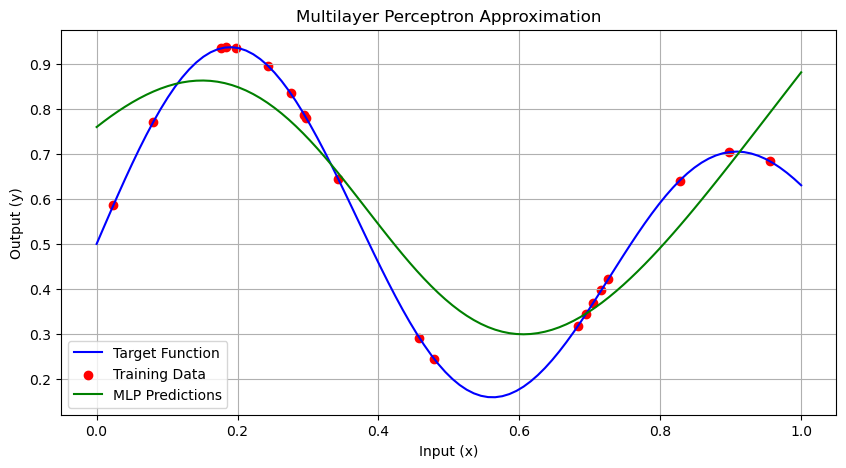

In [8]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(X_test, y_test, label='Target Function', color='blue')
plt.scatter(X, y, color='red', label='Training Data')
plt.plot(X_test, predictions, label='MLP Predictions', color='green')
plt.title('Multilayer Perceptron Approximation')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid()
plt.show()